## CSCI E-89C Deep Reinforcement Learning, Summer 2020
### Section 3

## k-armed Bandit Problem: Gradient Bandit Algorithm

Environment generates rewards with mean 4, 6, 8, and 10 for actions 1, 2, 3, and 4, respectively:

In [148]:
import random,  math
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        q_star = 2+2*action
        return random.gauss(q_star,1)

Agent follows the Gradient Bandit Algorithm with $\alpha$ = 0.4:

In [149]:
class Agent:
    def __init__(self, k):
        self.current_reward = 0.0
        self.current_action = []
        self.Ht = np.full(k, fill_value=0.)
        self.avgRt = np.full(1, fill_value=0.)
        self.policy = np.full(k, fill_value=1/k, dtype=float)


    def step(self, env, alpha = 0.04):
        actions = env.admissible_actions()
        At = self.select_action(actions)
        Rt = env.get_reward(At)
        
        self.avgRt = self.avgRt + (1/(env.time-1))*(Rt-self.avgRt)
        for a in actions:
            if a == At:
                self.Ht[a-1] = self.Ht[a-1] + alpha*(Rt-self.avgRt)*(1-self.policy[a-1])
            else:
                self.Ht[a-1] = self.Ht[a-1] - alpha*(Rt-self.avgRt)*self.policy[a-1]
        
        self.current_action = At
        self.current_reward = Rt
    
    def select_action(self, actions):
        norm = sum(math.exp(pref) for pref in self.Ht)
        for action in actions:
            self.policy[action-1] = math.exp(self.Ht[action-1]) / norm
        action_selected = np.random.choice(actions, p = self.policy)
        return action_selected

1 epoch for T = 100:

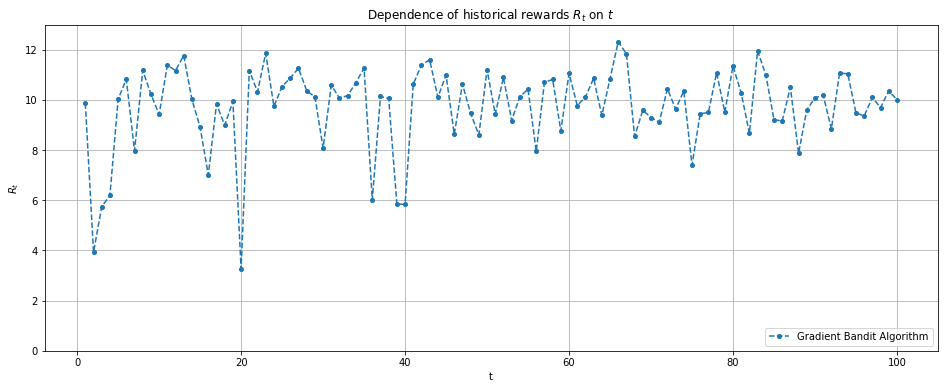

In [152]:
def rewards_hist(T = 10, k = 10, alpha = 0.1):
    env = Environment()
    agent = Agent(k)
    rewards = []
    while env.time <= T:
        agent.step(env,alpha)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
np.random.seed(167)
T = 100
k = 4
alpha = 0.4

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T, k, epsilon), linestyle='--', marker='o', markersize=4, label='Gradient Bandit Algorithm')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.ylim(0, 13)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

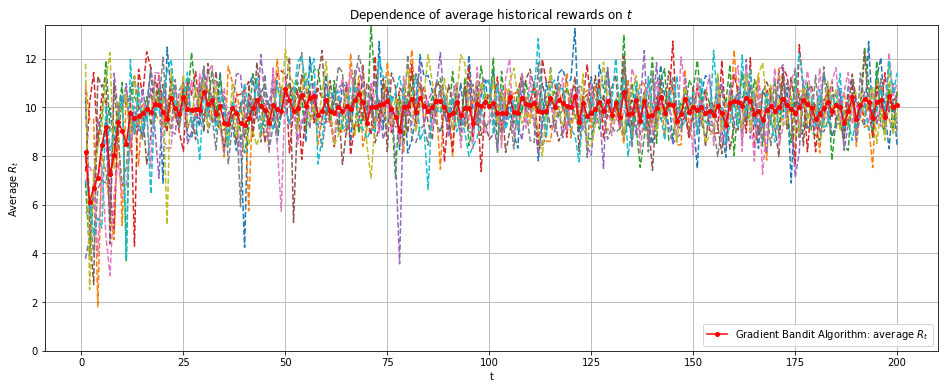

In [153]:
np.random.seed(167)
T = 200
k = 4
alpha = 0.4
episodes = 10

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, alpha))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),np.transpose(all_rewards), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='Gradient Bandit Algorithm: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$')
plt.ylim(0, 13.4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()


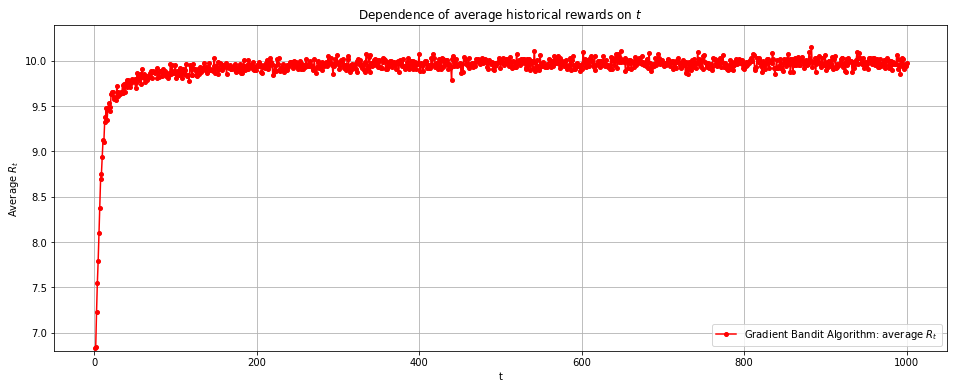

In [154]:
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
episodes = 500

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, alpha))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='Gradient Bandit Algorithm: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$')
plt.ylim(6.8, 10.4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

Let's look at the historical actions:

In [155]:
def actions_hist(T = 10, k = 10, alpha = 0.04):
    env = Environment()
    agent = Agent(k)
    actions = []
    while env.time <= T:
        agent.step(env,alpha)
        actions.append(agent.current_action)
    return np.asarray(actions)

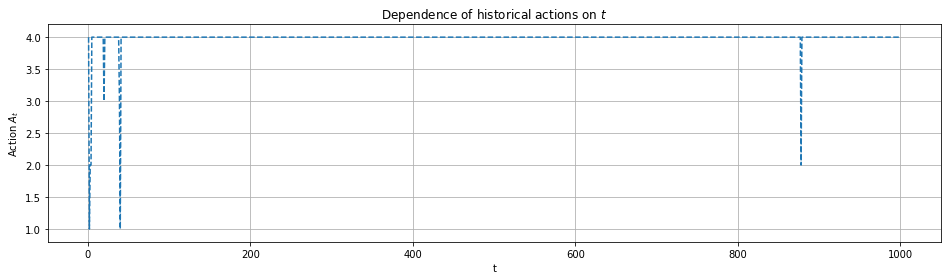

In [156]:
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
episodes = 1

all_actions = []
for i in range(1, episodes+1):
    all_actions.append(actions_hist(T, k, alpha))

all_actions = np.asarray(all_actions)
#avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,4))
plt.plot(range(1,T+1),np.transpose(all_actions), linestyle='--', marker=None, markersize=4)
#plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='$\epsilon$-greedy: average $R_t$')
plt.xlabel("t")
plt.ylabel("Action $A_t$")
plt.title('Dependence of historical actions on $t$')
plt.ylim(0.8, 4.2)
plt.grid(True)
#plt.legend(loc = 'upper right')
plt.show()

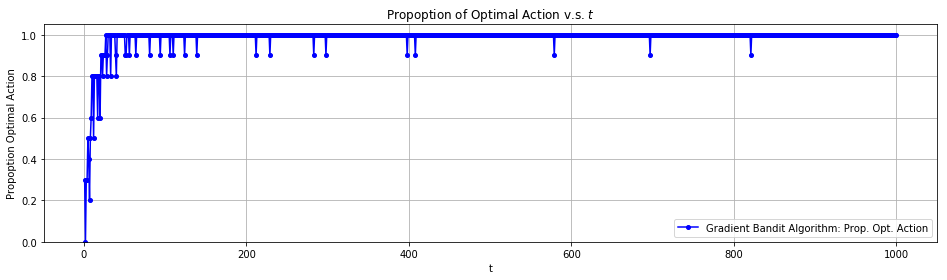

In [157]:
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
episodes = 10

all_actions = []
for i in range(1, episodes+1):
    all_actions.append(actions_hist(T, k, alpha))

all_actions = np.asarray(all_actions)
#avg_rewards = (np.mean(all_rewards, axis=0))
best_actions = (all_actions == 4)*1
prop_actions = np.sum(best_actions, axis=0) / episodes

plt.figure(figsize=(16,4))
#plt.plot(range(1,T+1),np.transpose(all_actions), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),prop_actions, linestyle='-', marker="o",color = "b", markersize=4, label='Gradient Bandit Algorithm: Prop. Opt. Action')
plt.xlabel("t")
plt.ylabel("Propoption Optimal Action")
plt.title('Propoption of Optimal Action v.s. $t$')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

## Markov Decision Process (MDP): Gradient Bandit Algorithm?

If state is 1, environment generates rewards with mean 4, 6, 8, and 10 for actions 1, 2, 3, and 4, respectively. If state is 2, environment generates rewards with mean -10, -8, -6, and -4 for actions 1, 2, 3, and 4, respectively.  The Environment can change its state only if the agent selects action 1, and the probability of the switch is 0.05:

In [158]:
import random,  math
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self,S0):
        self.time = 1
        self.state = S0
        
    def admissible_states(self):
        return list(range(1,3))

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        if self.state == 1:
            q_star = 2+2*action
        else: 
            q_star = -12+2*action
        
        if action == 1:
            rand_num = random.uniform(0,1)
            if rand_num <= 0.05:
                self.state = 3 - self.state 
                
        return random.gauss(q_star,1)

Agent follows a modifed version of Gradient Bandit Algorithm with $\alpha$ = 0.4:

In [159]:
class Agent:
    def __init__(self, k, num_states):
        self.current_reward = 0.0
        self.current_action = []
        self.Ht = np.full(shape=(k,num_states), fill_value=0.)
        self.avgRt = np.full(num_states, fill_value=0.)
        self.policy = np.full(shape=(k,num_states), fill_value=1/k, dtype=float)
        self.Nt = np.zeros(num_states)


    def step(self, env, alpha = 0.04):
        actions = env.admissible_actions()
        St = env.state
        self.Nt[St-1] = self.Nt[St-1]+1
        At = self.select_action(St,actions)
        Rt = env.get_reward(At)
        
        self.avgRt[St-1] = self.avgRt[St-1] + (1/self.Nt[St-1])*(Rt-self.avgRt[St-1])
        for a in actions:
            if a == At:
                self.Ht[a-1][St-1] = self.Ht[a-1][St-1] + alpha*(Rt-self.avgRt[St-1])*(1-self.policy[a-1][St-1])
            else:
                self.Ht[a-1][St-1] = self.Ht[a-1][St-1] - alpha*(Rt-self.avgRt[St-1])*self.policy[a-1][St-1]
        
        self.current_action = At
        self.current_reward = Rt
    
    def select_action(self, state, actions):
        norm = sum(math.exp(pref) for pref in self.Ht[:,state-1])
        for action in actions:
            self.policy[action-1,state-1] = math.exp(self.Ht[action-1,state-1]) / norm
        action_selected = np.random.choice(actions, p = self.policy[:,state-1])
        return action_selected

MDP: 1 epoch for T = 1000

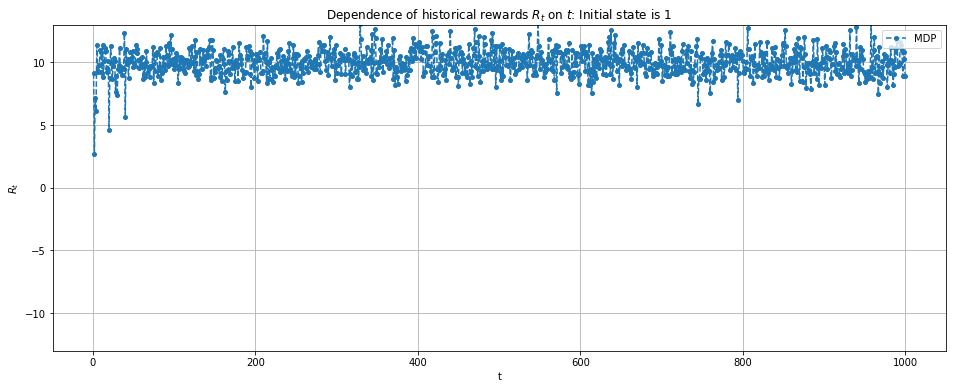

In [160]:
def rewards_hist(T = 10, k = 10, S0 = 1, alpha = 0.1):
    env = Environment(S0)
    agent = Agent(k,2)
    rewards = []
    while env.time <= T:
        agent.step(env,alpha)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
S0 = 1

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T, k, S0, alpha), linestyle='--', marker='o', markersize=4, label='MDP')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$: Initial state is 1')
plt.ylim(-13, 13)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

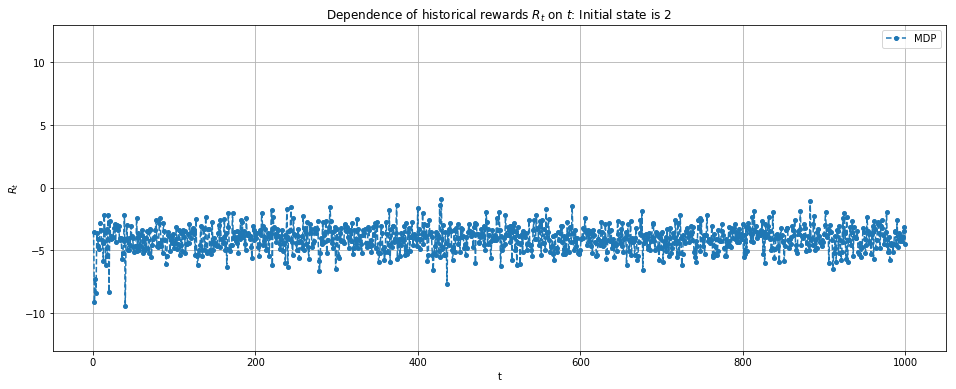

In [162]:
def rewards_hist(T = 10, k = 10, S0 = 1, alpha = 0.1):
    env = Environment(S0)
    agent = Agent(k,2)
    rewards = []
    while env.time <= T:
        agent.step(env,alpha)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
S0 = 2

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T, k, S0, alpha), linestyle='--', marker='o', markersize=4, label='MDP')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$: Initial state is 2')
plt.ylim(-13, 13)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

MDP: 50 epochs for T = 1000

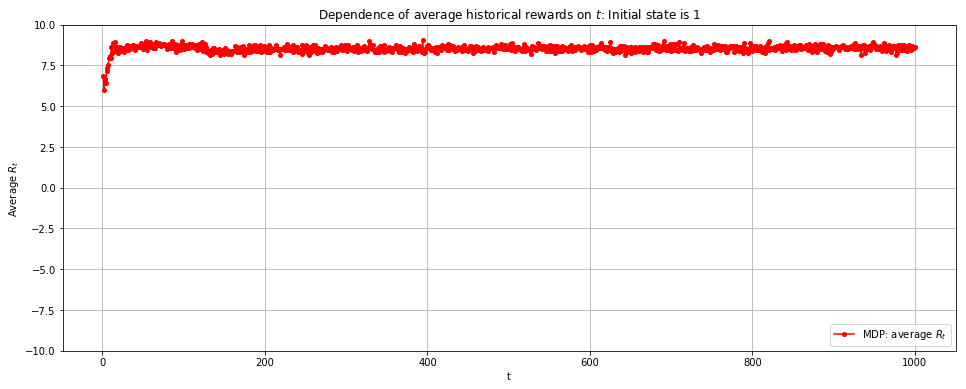

In [165]:
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
S0 = 1 
episodes = 50

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, S0, alpha))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='MDP: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$: Initial state is 1')
plt.ylim(-10, 10)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

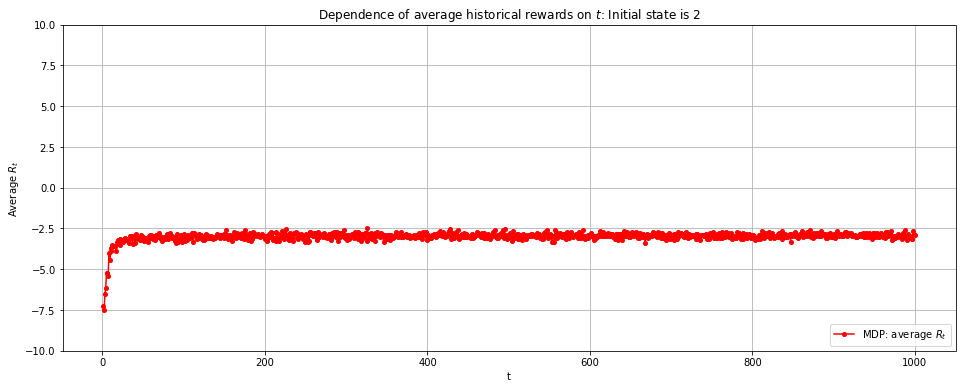

In [166]:
np.random.seed(167)
T = 1000
k = 4
alpha = 0.4
S0 = 2 
episodes = 50

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, S0, alpha))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='MDP: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$: Initial state is 2')
plt.ylim(-10, 10)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()